<a href="https://colab.research.google.com/github/arijitar/Diabetic-Retinopathy-detection/blob/main/Layer_By_Layer_InceptionV3_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inception V1 Module 1


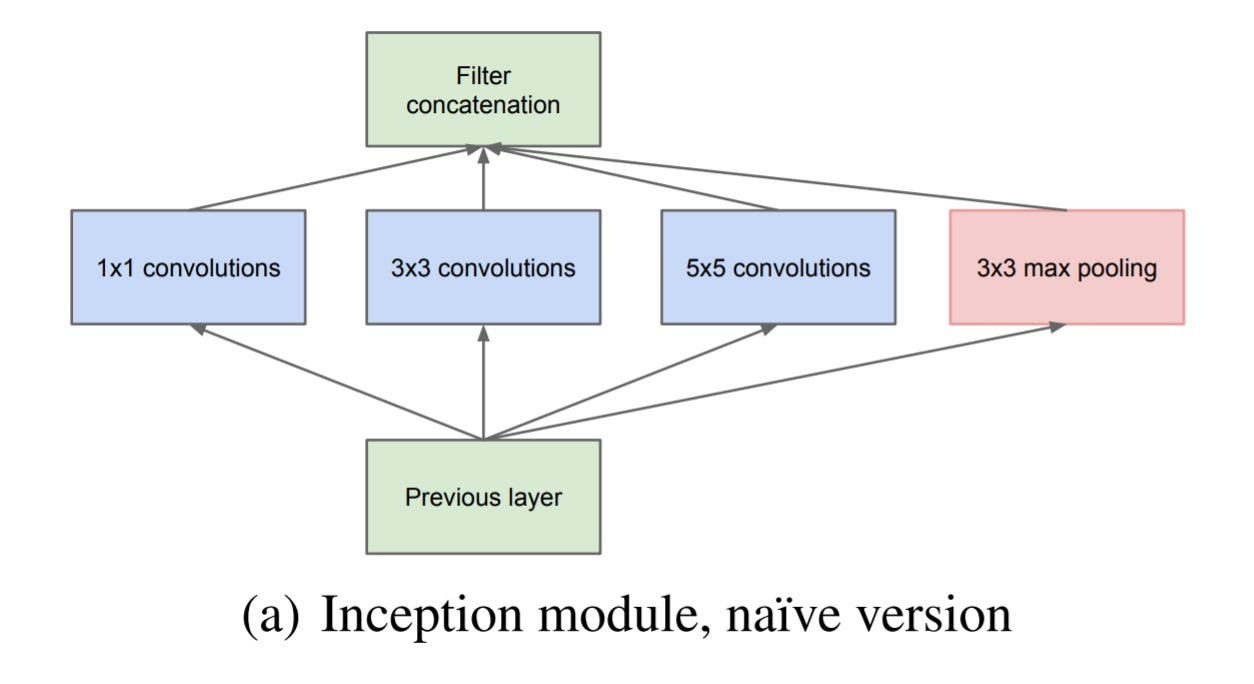

The Idea is that the model will learn form its parallel filters of different filter sizes.
Now,
Why do we have different Filter sizes ?
--> Smaller the information area  = smaller filter size & Lager the information area = Larger filter size.

Now, Another question is how to choose smaller filter size or larger filter size ?
 During training a model we can't justify that for this image use this filter size and for this image choose this particular filter size, the model will be train in one go therefore, we have multiple parallel filters of different sizes.


# Inception V1 module 2 --> Dimention Reduction or No of Parameters reduction for less computation power

--> Less parameters means less computational power required.

--> Therefore we will just apply (1 x 1) convolutional layer before (3 x 3) & (5 x 5) convolutional layer and also (1 x 1) convolutional layer after (3 x 3) pooling layer.


ex. Image we have an image of (32 * 32 * 512) and we need to apply (5 * 5) window of 128 such filters --> means we need 128 such filters of (5, 5,   512), therefore 5 * 5 * 512 = 12800 parameters.


Now if we apply (1 * 1) convolutional layer before (5 * 5) layer, then we perform (1 * 1 * 512) of 128 filters of size (1 * 1 * 512) = 512 parameters which is very less as compared to previous one.



Therefore the image size is reduced from (32 * 32 * 512) to (32 * 32 *128) and now we will apply (5 * 5) convolutions and the computations will be less.




# Inception V3 --> What are the modifications done on Module 2 of Inception V1 to become V3

# Inception Block A

--> Here we have factorized the layers into samller convolutional layers by replacing (5 * 5) convolutional Layer with 2 (3 * 3) convolutional layers because [5 * 5 = is giving 25 parameters] whereas [(3 * 3) + (3 * 3) = is giving us only 18 parameters].


# Inception Block C
--> Now again we have factorized the (3 * 3) convolutional layers into Asymmetric convolutional layer. [i.e. (1 * 3) & (3 * 1)] becuase (3 * 3 = is giving us 9 parameters) but {[1 * 3]+[3 * 1] = is giving us only 6 parameters}

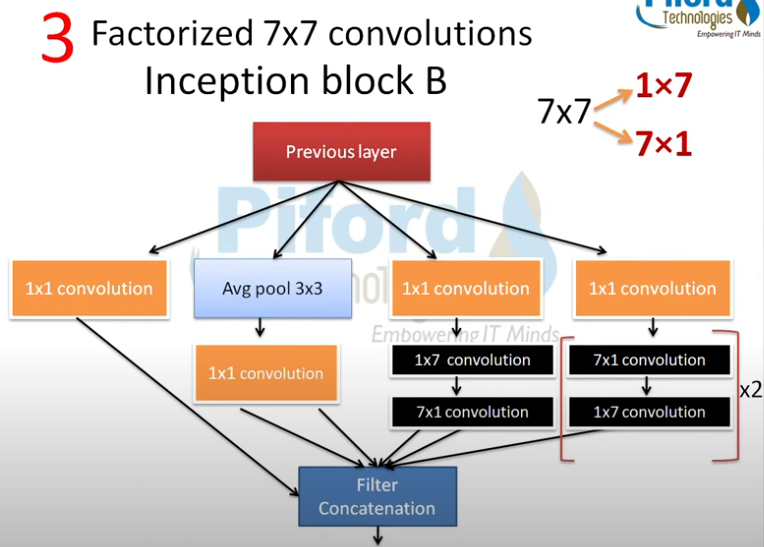

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import PIL
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_type_folders = os.listdir('/content/drive/MyDrive/DataSet')
print("Folders inside Dataset Folder = ",image_type_folders)

Folders inside Dataset Folder =  ['positive', 'negative']


In [ ]:
retinopathy_images = []

for folders in image_type_folders:
  # enter each folder one by one
  folder_name = os.listdir('/content/drive/MyDrive/DataSet' + '/' + folders)

  # adding images to the list from a specific folder
  for images in folder_name:
    retinopathy_images.append((folders, str('/content/drive/MyDrive/DataSet' + '/' + folders) + '/' + images))
    print(retinopathy_images[:1])

[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

In [ ]:
images_df = pd.DataFrame(data=retinopathy_images, columns=['Type', 'Image'])
images_df.head()

,Type,Image
0,positive,/content/drive/MyDrive/DataSet/positive/Modera...
1,positive,/content/drive/MyDrive/DataSet/positive/Modera...
2,positive,/content/drive/MyDrive/DataSet/positive/Modera...
3,positive,/content/drive/MyDrive/DataSet/positive/Modera...
4,positive,/content/drive/MyDrive/DataSet/positive/Modera...


In [ ]:
# let's check how many samples are there
print("Total number of images in the dataset: ", len(images_df))

Total number of images in the dataset:  2752


In [ ]:
images_count = images_df['Type'].value_counts()

images_count


,count
Type,
positive,1750
negative,1002


In [ ]:
import cv2
path = '/content/drive/MyDrive/DataSet'

image_size = 299 # default image size 299 * 299 * 3
images = []
labels = []

for folder_names in image_type_folders:
  data_path = path + '/' + folder_names
  filenames = [folder_names for folder_names in os.listdir(data_path)]

  for f in filenames:
    img = cv2.imread(data_path + '/' + f) # reading images in the form of an array of pixel values
    img = cv2.resize(img, (image_size, image_size)) # here we are resizing all the images into same size
    images.append(img)
    labels.append(folder_names)

In [ ]:
# Converting image array into numpy array
images = np.array(images)
images = images.astype('float32') / 255.0
# Here we are dividing by 255 becuase most of the image format is having raw pixel values that lies between 0 - 255
# Nural network models train better and faster when the features are scaled down in between the range of 0.0 to 1.0
# By dividing with 255 we transform each pixel value of range [0,255] to a normalized value in the range of [0.0, 1.0]
images.shape

(2752, 299, 299, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels)

labels = labels.reshape(-1, 1)

Y = to_categorical(labels)
Y.shape

[1 1 1 ... 0 0 0]


(2752, 2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, Y, test_size = 0.2, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2201, 299, 299, 3)
(551, 299, 299, 3)
(2201, 2)
(551, 2)


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Input, concatenate, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu


In [ ]:
# x is the input image
# f1, f3r, f3, f5r, f5 & totalFilters tells that how many matrix windows of what size are going to be used in different part of the block during convolution
def inception_block(x, f1, f3r, f3, f5r, f5, totalFilters):
    # Branch 1: apply 1x1 Convolution with a specific window size (i.e. f1) & reduce the number of parameters of an image (compressing) with reLU activation function
    # This Branch is for small images only
    branch1 = Conv2D(f1, (1, 1), padding='same', activation='relu')(x)

    # Branch 2: 1x1 followed by 3x3 Convolution (i.e. 1st reducing the number of parameters of an image using 1x1 convolution and then performing 3x3 convolution with ReLU activation function)
    # Hence it makes the convolution faster and cheaper
    # This Branch2 is for medium images Only
    branch2 = Conv2D(f3r, (1, 1), padding='same', activation='relu')(x)
    branch2 = Conv2D(f3, (3, 3), padding='same', activation='relu')(branch2)

    # Branch 3: 1x1 followed by 5x5 Convolution (i.e. 1st reduce the number of parameters of an image using 1x1 and then apply 5x5 convolution.)
    # It makes the convolution faster other wise if we directly use 5x5 then it will take a lot of time and memory.
    # This Branch3 is for wide images Only
    branch3 = Conv2D(f5r, (1, 1), padding='same', activation='relu')(x)
    branch3 = Conv2D(f5, (5, 5), padding='same', activation='relu')(branch3)

    # Branch 4: 3x3 MaxPooling followed by 1x1 Convolution (i.e. Maxpooling only focuses on the most important part of an image)
    # totalFilters means how many solid features we want to learn from that pooled image.
    # Stride = It means move the window 1 pixel at a time
    # This Branch4 is for the summary view of an image
    branch4 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch4 = Conv2D(totalFilters, (1, 1), padding='same', activation='relu')(branch4)

    # Combine all branches
    # Why axis = -1 ? (such that to keep the image size as same but add all the features from different branch into a single big tensor)
    output = concatenate([branch1, branch2, branch3, branch4], axis=-1)
    return output


In [ ]:
input_layer = Input(shape=(299, 299, 3))  # InceptionV3 default input size is 299 * 299 * 3 || 3 means--> RGB coloured image

# Initial convolution and pooling layer (Early stage feature extraction and preprocessing the images before feeding into the complex inception block)

# stride = move the window 2 pixel at a time
# We are extracting 16 different features of an image with a window size of 3x3 which moves 2 pixels at a time during scanning of an image row by row.
# Padding = 'valid' means adding no extra space around the image
# Padding = 'same' means adding extra space around the image to cover the edges of an image fully
x = Conv2D(16, (3, 3), strides=(2, 2), padding='valid', activation='relu')(input_layer)
x = Conv2D(16, (3, 3), padding='valid', activation='relu')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)

# Just One more conv and pooling before inception blocks

x = Conv2D(40, (1, 1), padding='valid', activation='relu')(x)
x = Conv2D(64, (3, 3), padding='valid', activation='relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)



# | Parameter      | Value | Meaning                                 | Filter Size |
#| -------------- | ----- | --------------------------------------- | ----------- |
#| `f1`           | 32    | Number of 1×1 filters in Branch 1       | 1×1         |
#| `f3r`          | 24    | Number of 1×1 filters before 3×3 conv   | 1×1         |
#| `f3`           | 32    | Number of 3×3 filters                   | 3×3         |
#| `f5r`          | 8     | Number of 1×1 filters before 5×5 conv   | 1×1         |
#| `f5`           | 16    | Number of 5×5 filters                   | 5×5         |
#| `totalFilters` | 16    | Number of 1×1 filters after max pooling | 1×1         |


# x = input image

# Add a few Inception blocks

x = inception_block(x, 32, 24, 32, 8, 16, 16)
# x = inception_block(x, 64, 48, 64, 16, 32, 32)
# x = inception_block(x, 64, 48, 64, 16, 32, 32)

# We are commenting few inception blocks because adding more inception blocks increases the no. of parameters & hence the GPU crashes
# which is not handled by the free GPU

# Global Average Pooling and Dense Layer

x = GlobalAveragePooling2D()(x)

x = Dropout(0.4)(x) # During training the model it randomly drops 40% of nurons such that to prevent overfitting problem

output_layer = Dense(2, activation='softmax')(x)  # Final dense layer is having 2 classes only (i.e. positive and negative in our case)

# Creates the model
model = Model(inputs=input_layer, outputs=output_layer)

# Makes an summary of the model that we have created
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      2,320 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │      4,640 │ conv2d_1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      1,320 │ max_pooling2d[0]… │
│                     │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │     23,104 │ conv2d_3[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 35, 35,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 35, 35,    │      1,560 │ max_pooling2d_1[… │
│                     │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 35, 35, 8) │        520 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 35, 35,    │          0 │ max_pooling2d_1[… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 35, 35,    │      2,080 │ max_pooling2d_1[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 35, 35,    │      6,944 │ conv2d_6[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 35, 35,    │      3,216 │ conv2d_8[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 35, 35,    │      1,040 │ max_pooling2d_2[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 35, 35,    │          0 │ conv2d_5[0][0],   │
│ (Concatenate)       │ 96)               │            │ conv2d_7[0][0],   │
│                     │                   │            │ conv2d_9[0][0],   │
│                     │                   │            │ conv2d_10[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 47,386 (185.10 KB)

 Trainable params: 47,386 (185.10 KB)

 Non-trainable params: 0 (0.00 B)

# Compiling the Model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the Model

In [ ]:
 # Adjust epochs and batch size as per your requirement

 # Validation split = 0.2 means 80% of our data is used for training the model and 20% of the data is kept aside automatically
 # to check if the model is learning well or not after each epochs.
history = model.fit(x_train, y_train, epochs=40, batch_size = 128, validation_split = 0.2)

Epoch 1/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9894 - loss: 0.0294 - val_accuracy: 0.9524 - val_loss: 0.3073
Epoch 2/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step - accuracy: 0.9968 - loss: 0.0106 - val_accuracy: 0.9501 - val_loss: 0.2134
Epoch 3/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.9936 - loss: 0.0201 - val_accuracy: 0.9546 - val_loss: 0.3812
Epoch 4/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 243ms/step - accuracy: 0.9998 - loss: 0.0045 - val_accuracy: 0.9524 - val_loss: 0.4013
Epoch 5/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step - accuracy: 0.9994 - loss: 0.0032 - val_accuracy: 0.9524 - val_loss: 0.4578
Epoch 6/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step - accuracy: 0.9988 - loss: 0.0035 - val_accuracy: 0.9546 - val_loss: 0.4465
Epoch 7/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 227ms/step - accuracy: 0.9998 - loss: 0.0015 - val_accuracy: 0.9592 - val_loss: 0.4308
Epoch 8/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - accuracy: 0.9985 - loss: 0.0030 - val_accuracy: 0.95

In [ ]:
# Saving the model for the User Interactive application part
# model.save('customInceptionV3.keras')

In [ ]:
y_pred = model.predict(x_test)
y_pred

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


array([[1.5465876e-14, 1.0000000e+00],
       [1.9305990e-28, 1.0000000e+00],
       [8.8997436e-01, 1.1002564e-01],
       ...,
       [0.0000000e+00, 1.0000000e+00],
       [6.7912527e-35, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00]], dtype=float32)

1. 93.83% accuracy on 30 epochs
2. 95.46% accuracy on 40 epochs
3. 95.46% accuracy on 50 epochs which is constant. Therefore we are not going to increase the epochs as it is giving a constant output

# Testing the model and finding the overall model Accuracy

In [ ]:
import math
loss, test_accuracy = model.evaluate(x_test, y_test)
accuracy = test_accuracy * 100
print(accuracy)
rounded = math.ceil(accuracy)
print(f"Overall Accuracy of the model = {rounded}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9619 - loss: 0.4576
95.46279311180115
Overall Accuracy of the model = 96%


# Plotting the Accuracy Graph of the Model

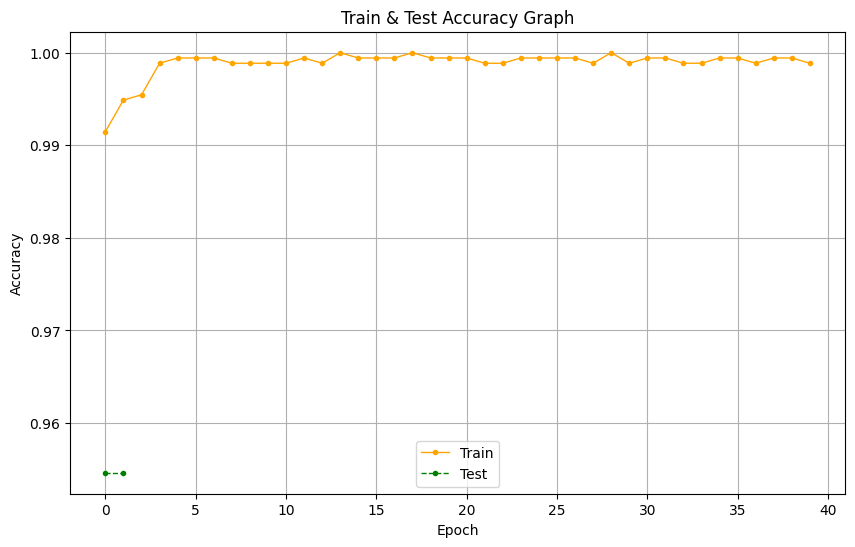

In [ ]:
import matplotlib.pyplot as plt

x_value = test_accuracy

def plot_accuracyGraph(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.history['accuracy'], color = 'orange', linewidth = 1, marker = '.')
  plt.plot([x_value,x_value], color='green', linestyle='--', label=f'x = {x_value}', linewidth = 1, marker = '.')
  plt.title('Train & Test Accuracy Graph')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.grid(True)
  plt.legend(['Train', 'Test'], loc='lower center')
  plt.show()

plot_accuracyGraph(history)